# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

C:\Users\User\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\User\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names


training label shape: (2034L,)
test label shape: (677L,)
dev label shape: (676L,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


#### (1) For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):
### STUDENT START ###
    
    for i in range(num_examples):
        print("Message #%i:" %(i+1))
        print(train_data[i])
        print("Label: %s" %newsgroups_train.target_names[train_labels[i]])
        print("------------------------------------------------------------")
        
### STUDENT END ###
P1()

Message #1:
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
Label: comp.graphics
------------------------------------------------------------
Message #2:


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demon

#### (2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [4]:
def P2():
### STUDENT START ###

    #Convert raw training text into feature vectors using sklearn CountVectorizer()
    cv = CountVectorizer()
    matrix = cv.fit_transform(train_data)
    
    
    #a)
    print("a)")
    # Size of the Vocabulary
    print("Size of the Vocabulary: %i" %matrix.shape[1])

    # Avg Number of Non Zero Features per Example
    print("Avg Number of Non Zero Features per Example: %i" %(matrix.nnz / matrix.shape[0]))
    
    # Fraction of Entries that are non-zero
    print("Fraction of Entries that are non-zero: %i / %i" %(float(matrix.nnz) , (matrix.shape[0]*matrix.shape[1])))
    print("Percent of Entries that are non-zero: %0.5f%%" %((float(matrix.nnz) / (matrix.shape[0]*matrix.shape[1]))*100))
    print("")
    
    
    #b)
    print("b)")
    #0th Feature Name
    print("0th Feature Name: %s" %cv.get_feature_names()[0])
    
    #0th Feature Name
    print("Last Feature Name: %s" %cv.get_feature_names()[-1])
    print("")
    
    
    #c)
    print("c)")
    #Convert raw training text into feature vectors using a defined vocabulary
    test_vocabulary = ["atheism", "graphics", "space", "religion"]
    cv2 = CountVectorizer(vocabulary = test_vocabulary)
    matrix2 = cv2.fit_transform(train_data)
    
    # # of Features (Should equal 4)
    print("# of Features: %i" %matrix2.shape[1])
    
    # Avg Number of Non Zero Features per Example
    print("Avg Number of Non Zero Features per Example: %0.2f" %(float(matrix2.nnz) / matrix2.shape[0]))    
    print("")
    
    
    #d)
    print("d)")
    # Fit Bigram Features (Assume Bigram means both unigrams and bigrams are included in the vocabulary)
    print("Bigram Fit")
    cv3 = CountVectorizer(analyzer = 'word', ngram_range = (1,2))
    matrix3 = cv3.fit_transform(train_data)    
    
    # Size of the Vocabulary
    print("Size of the Vocabulary: %i" %matrix3.shape[1])
    
    # Fit Trigram Features (Assume Trigram means all unigrams, bigrams and trigrams are included in the vocabulary)
    print("Trigram Fit")
    cv4 = CountVectorizer(analyzer = 'word', ngram_range = (1,3))
    matrix4 = cv4.fit_transform(train_data)    
    
    # Size of the Vocabulary
    print("Size of the Vocabulary: %i" %matrix4.shape[1])    
    print("")
    
    
    #e)
    print("e)")
    # Removing words from Vocabulary if they reside in less than 10 documents
    print("Removing words from Vocabulary if they reside in less than 10 documents")    
    cv5 = CountVectorizer(min_df = 10)
    matrix5 = cv5.fit_transform(train_data)

    # Size of the Vocabulary
    print("Size of the Vocabulary: %i" %matrix5.shape[1])
    print("")
    
    
    #f)
    print("f)")    
    # Fit vocabulary to dev set only
    cv6 = CountVectorizer()
    matrix6 = cv6.fit_transform(dev_data)
    
    # Fraction of Dev Words missing from Train Vocabulary (runs slow, is there a more efficient way?)
    count_missing = 0
    for word in cv6.get_feature_names():
        if word not in cv.get_feature_names():
            count_missing += 1
    print("Fraction of Dev Words missing from Train Vocabulary: %0.2f" %(float(count_missing) / len(cv6.get_feature_names())))
    
### STUDENT END ###
P2()

a)
Size of the Vocabulary: 26879
Avg Number of Non Zero Features per Example: 96
Fraction of Entries that are non-zero: 196700 / 54671886
Percent of Entries that are non-zero: 0.35978%

b)
0th Feature Name: 00
Last Feature Name: zyxel

c)
# of Features: 4
Avg Number of Non Zero Features per Example: 0.27

d)
Bigram Fit
Size of the Vocabulary: 221770
Trigram Fit
Size of the Vocabulary: 537462

e)
Removing words from Vocabulary if they reside in less than 10 documents
Size of the Vocabulary: 3064

f)
Fraction of Dev Words missing from Train Vocabulary: 0.25


#### (3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K Nearest Neighbors Classifier


C:\Users\User\Anaconda2\lib\site-packages\sklearn\grid_search.py:438: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


F1 Score (default): 0.414
Optimal K: 50.000
F1 Score @ Best K: 0.409



C:\Users\User\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


Multinomial Naive Bayes Classifier
F1 Score (default): 0.760
Optimal alpha: 0.010
F1 Score @ Best alpha: 0.818

Logistic Regression Classifier
F1 Score (default): 0.727
Optimal C (Inverse Regularization Strength): 0.500
F1 Score @ Best C: 0.754

a) See Below
b) See Below
c) See Below


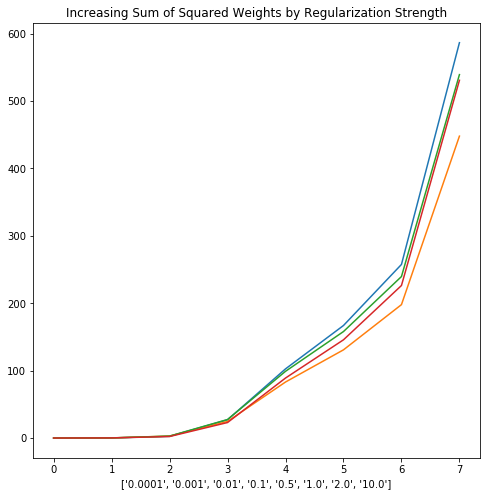

In [5]:
def P3():
### STUDENT START ###


    # KNN Classifier
    pipeline1 = Pipeline([('vect',CountVectorizer()), ('clf', KNeighborsClassifier())])

    gs = GridSearchCV(pipeline1, param_grid = {'clf__n_neighbors': [1,2,3,4,5,6,7,8,9,10,15,20,50,100,500]}, scoring='f1_macro')

    gs.fit(train_data, train_labels)
    print("K Nearest Neighbors Classifier")
    print("F1 Score (default): %0.3f" % gs.score(test_data, test_labels))
    print("Optimal K: %0.3f" % gs.best_params_['clf__n_neighbors'])
    print("F1 Score @ Best K: %0.3f" % gs.best_score_)
    print("")

    
    # Multinomial Naive Bayes Classifier
    pipeline2 = Pipeline([('vect',CountVectorizer()), ('clf', MultinomialNB())])

    gs = GridSearchCV(pipeline2, param_grid = {'clf__alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}, scoring='f1_macro')

    gs.fit(train_data, train_labels)
    print("Multinomial Naive Bayes Classifier")
    print("F1 Score (default): %0.3f" % gs.score(test_data, test_labels))
    print("Optimal alpha: %0.3f" % gs.best_params_['clf__alpha'])
    print("F1 Score @ Best alpha: %0.3f" % gs.best_score_)
    print("")

    
    # Logistic Regression Classifier
    pipeline3 = Pipeline([('vect',CountVectorizer()), ('clf', LogisticRegression())])

    gs = GridSearchCV(pipeline3, param_grid = {'clf__C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}, scoring='f1_macro')

    gs.fit(train_data, train_labels)
    print("Logistic Regression Classifier")
    print("F1 Score (default): %0.3f" % gs.score(test_data, test_labels))
    print("Optimal C (Inverse Regularization Strength): %0.3f" % gs.best_params_['clf__C'])
    print("F1 Score @ Best C: %0.3f" % gs.best_score_)
    print("")
    
    
    print("a) See Below")
    print("b) See Below") 
    print("c) See Below")
    cv = CountVectorizer()
    matrix = cv.fit_transform(train_data)
    results = np.zeros((4,8))
    run = 0
    for each in [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:

        lr = LogisticRegression(C = each)
        lr.fit(matrix, train_labels)
        for i in range(4):
            results[i,run] = np.sum((lr.coef_[i])**2)
        run += 1

    plt.figure(figsize = (8,8))
    plt.plot(np.transpose(results))
    plt.xlabel(["0.0001", "0.001", "0.01", "0.1", "0.5", "1.0", "2.0", "10.0"])
    plt.title("Increasing Sum of Squared Weights by Regularization Strength")
    plt.show
    
    

### STUDENT END ###
P3()

ANSWER: 

a) Nearest Neighbors doesn't work well for this problem because of the sparseness of the data in the feature matrix. As non-zero entries are hard to come by, larger values of the KNN are required to establish relationships between features and the dependent variable.

b) Logistic Regression might not work as well as Naive Bayes because logistic regression uses gradient descent in order to minimize its cost function which can result in a local minimum being found instead of a global minimum, resulting in biased results. Naive Bayes on the other hand is just calculating the probability of a specific class with the individual probabilities of the words in the post which becomes more accurate as we increase the number of data points. 

c) As C increases the regularization strength decreases, resulting in the sum of squared weights also increasing. This is as expected, because a weaker regularization can often result in overfitting which in turn results in larger residuals when the model is run on the test set. 

#### (4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [6]:
#def P4():
### STUDENT START ###

# Fit the model, preprocessing words into a unigram vocabulary
cv = CountVectorizer()
vectorized_train_data = cv.fit_transform(train_data)
lr = LogisticRegression()
lr.fit(vectorized_train_data, train_labels)

print("Top 5 One-Grams in each of the 4 Labels by Weight")
print("")

# Loop through the top 5 weights for each label and store those indices in a list
class_index = 0
row_index = 0
top_20_indices = []
for label in range(4):
    print("Class: %s" %newsgroups_train.target_names[class_index])
    print("")
    # Find the indices of the top 5 weights for this label
    max_indices = np.argsort(-lr.coef_[label])[:5]
    
    # For each class print the top 5 words and weightings & update top_20_indices list
    for each in max_indices:
        top_20_indices.append(each)
        print("Word: %-10s \t\t Weight: %0.2f" %(cv.get_feature_names()[each], lr.coef_[label][each]))
        row_index += 1
    class_index += 1
    print("--------------------------------------------------")

# Create an array for the top 20 indexes and populate the weights for each class, then print to screen
top_weights_by_class = np.zeros((20,4))
column_names = [str(i) for i in newsgroups_train.target_names]
row = 0

for row_index in top_20_indices:
    for column in range(4):
        top_weights_by_class[row, column] = np.round(lr.coef_[column][row_index],2)
    row += 1
    
# Print top 5 one grams & associated weight for each label
print("")
print("Weight for each Label of the top 5 One-Grams / Label")
print('\t\t\t%s\t%s      %s      %s' %('alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space'))
row_labels = ['%s' % cv.get_feature_names()[i] for i in top_20_indices]
for row_label, row in zip(row_labels, top_weights_by_class):
    print('%-10s \t [%s]' % (row_label, ' '.join('%018s' % i for i in row)))



print("")
print("")
print("")
print("********************************************************")



# Fit the model but preprocess words into a bigram vocabulary
cv = CountVectorizer(ngram_range=(1, 2), analyzer='word')
vectorized_train_data = cv.fit_transform(train_data)
lr = LogisticRegression()
lr.fit(vectorized_train_data, train_labels)

print("Top 5 Two-Grams in each of the 4 Labels by Weight")
print("")

# Loop through the top 5 weights for each label and store those indices in a list
class_index = 0
row_index = 0
top_20_indices = []
for label in range(4):
    print("Class: %s" %newsgroups_train.target_names[class_index])
    print("")
    # Find the indices of the top 5 weights for this label
    max_indices = np.argsort(-lr.coef_[label])[:5]
    
    # For each class print the top 5 words and weightings & update top_20_indices list
    for each in max_indices:
        top_20_indices.append(each)
        print("Word: %-10s \t\t Weight: %0.2f" %(cv.get_feature_names()[each], lr.coef_[label][each]))
        row_index += 1
    class_index += 1
    print("--------------------------------------------------")

# Create an array for the top 20 indexes and populate the weights for each class, then print to screen
top_weights_by_class = np.zeros((20,4))
column_names = [str(i) for i in newsgroups_train.target_names]
row = 0

for row_index in top_20_indices:
    for column in range(4):
        top_weights_by_class[row, column] = np.round(lr.coef_[column][row_index],2)
    row += 1

# Print top 5 two grams & associated weight for each label
print("")
print("Weight for each Label of the top 5 Two-Grams / Label")
print('\t\t\t%s\t%s      %s      %s' %('alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space'))
row_labels = ['%s' % cv.get_feature_names()[i] for i in top_20_indices]
for row_label, row in zip(row_labels, top_weights_by_class):
    print('%-10s \t [%s]' % (row_label, ' '.join('%018s' % i for i in row)))

    
### STUDENT END ###
#P4()

Top 5 One-Grams in each of the 4 Labels by Weight

Class: alt.atheism

Word: deletion   		 Weight: 1.13
Word: atheists   		 Weight: 1.03
Word: bobby      		 Weight: 0.99
Word: religion   		 Weight: 0.95
Word: atheism    		 Weight: 0.94
--------------------------------------------------
Class: comp.graphics

Word: graphics   		 Weight: 1.94
Word: image      		 Weight: 1.35
Word: file       		 Weight: 1.27
Word: 3d         		 Weight: 1.13
Word: computer   		 Weight: 0.98
--------------------------------------------------
Class: sci.space

Word: space      		 Weight: 2.16
Word: orbit      		 Weight: 1.22
Word: nasa       		 Weight: 1.01
Word: launch     		 Weight: 0.94
Word: spacecraft 		 Weight: 0.92
--------------------------------------------------
Class: talk.religion.misc

Word: christians 		 Weight: 1.15
Word: christian  		 Weight: 1.12
Word: blood      		 Weight: 1.05
Word: fbi        		 Weight: 0.91
Word: order      		 Weight: 0.91
-------------------------------------------------

ANSWER: 

Of interest:  
Not sure why 'deletion' is the top weighted word in the atheism class? Seems unrelated.

In the one-grams table, its interesting that some numbers are heavily negatively weighted for one class while they are heavily positively weighted in another class. A good example is the word 'space' and how it is weighted 2.16 in sci.space but under -1 for all other labels. Additionally, there are some words that seem to have no effect on the classification of a certain label, like 'order' in comp.graphics and sci.space.

In the two-grams table, its interesting to note that the inclusion of bi-grams with the unigrams actually reduces the weighting for the top few unigrams in predicting a label. Also interesting to note that the top few bigrams are all actually unigrams. It's also interesting that 'hi' has positive weighting in the comp.graphics board but has negative weighting in all three other boards. Are people discussing atheism, miscellaneous religion and space not very friendly? 


#### (5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [7]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###

    s_out = []
    for item in s:
        # Convert to all lowercase
        new_item = item.lower()

        # Remove space characters & replace with a space
        new_item = re.sub(r'[ \t\n\r\f\v]', " ", new_item, flags=re.UNICODE) 
        
         # Remove punctuation characters at end of lines
        new_item = re.sub(r'[.,/\:;?!()*&^%$#@!}{}[]<>|]\s', " ", new_item, flags=re.UNICODE) 
                
        # Remove non alphanumeric characters
        new_item = re.sub(r'[^a-zA-Z0-9 ]', " ", new_item, flags=re.UNICODE)     

        # Remove single letter words except i and a
        new_item = re.sub(r'\s[^ai0123456789 ]\s', "", new_item, flags=re.UNICODE)

        # Replace sequences of numbers with the first number only
        def numbers(matchobj):
            return matchobj.group(0)[0]
        new_item = re.sub(r'\d\d*', numbers, new_item)
        
        # Split apart any number/letter combo
        def numbers2(matchobj):
            return matchobj.group(0)[0] + " " + matchobj.group(0)[1]
        new_item = re.sub(r'\w\d', numbers2, new_item)
        
        def numbers3(matchobj):
            return matchobj.group(0)[0] + " " + matchobj.group(0)[1]
        new_item = re.sub(r'\d\w', numbers3, new_item)
        
        # Shorten long words down to 5 letters
        def long_words(matchobj):
            return matchobj.group(0)[0:5]
        new_item = re.sub(r'\w\w+', long_words, new_item)
    
        s_out.append(new_item)
    return s_out

### STUDENT END ###

def P5():
### STUDENT START ###

    cv = CountVectorizer()
    vectorized_train_data = cv.fit_transform(empty_preprocessor(train_data))
    lr = LogisticRegression()
    lr.fit(vectorized_train_data, train_labels)
    dev_predictions = lr.predict(cv.transform(empty_preprocessor(dev_data)))
    print("Empty Preprocessor F1 Score: %0.2f" %metrics.f1_score(dev_labels, dev_predictions, average='macro'))


    cv2 = CountVectorizer()
    vectorized_train_data2 = cv2.fit_transform(better_preprocessor(train_data))
    lr2 = LogisticRegression()
    lr2.fit(vectorized_train_data2, train_labels)
    dev_predictions2 = lr2.predict(cv2.transform(better_preprocessor(dev_data)))
    print("Better Preprocessor F1 Score: %0.2f" %metrics.f1_score(dev_labels, dev_predictions2, average='macro'))

### STUDENT END ###
P5()

Empty Preprocessor F1 Score: 0.68
Better Preprocessor F1 Score: 0.70


#### (6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

The number of learned weights that do not equal zero in L1 regularized Logistic Regression: 1743
The number of learned weights that do not equal zero in L2 regularized Logistic Regression: 107516
Accuracy of an L2 Regularized Logistic Regression with defined vocabulary: 0.73


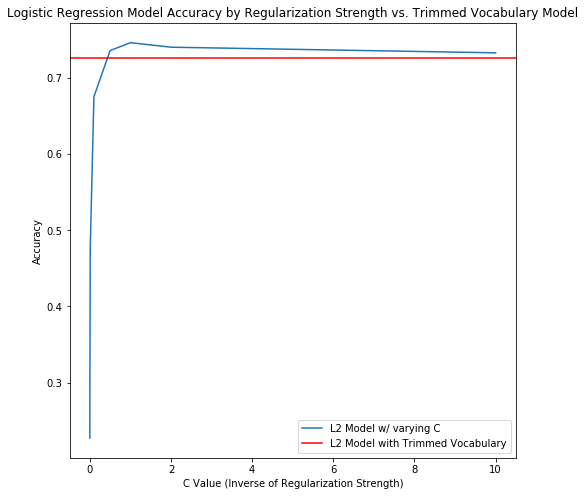

In [8]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    
    # Create a L1 Regularized Logistic Regression Model
    cv = CountVectorizer()
    vectorized_train_data = cv.fit_transform(train_data)
    vectorized_test_data = cv.transform(test_data)
    
    lr = LogisticRegression(penalty='l1')
    lr.fit(vectorized_train_data, train_labels)
      
    
    # Non-Zero Weights in logistic regression coefficient matrix
    non_zero_weights = 0
    for element in lr.coef_.flat:
        if element != 0: non_zero_weights +=1
    print("The number of learned weights that do not equal zero in L1 regularized Logistic Regression: %i" %non_zero_weights)
    
    # Create a L2 Regularized Logistic Regression Model to compare
    lr2 = LogisticRegression(penalty='l2')
    lr2.fit(vectorized_train_data, train_labels)
    
    # Non-Zero Weights in logistic regression coefficient matrix (forgot I could use matrix.nnz here)
    non_zero_weights2 = 0
    for element in lr2.coef_.flat:
        if element != 0: non_zero_weights2 +=1
    print("The number of learned weights that do not equal zero in L2 regularized Logistic Regression: %i" %non_zero_weights2)
    
    # Empty vector matching features length
    non_zero_features = np.zeros([len(cv.get_feature_names())])
    
    # Create an index that matches non-zero features
    for i in range(4):
        for feature_index in range(len(cv.get_feature_names())):
            if lr.coef_[i][feature_index] != 0:
                non_zero_features[feature_index] = 1
    
    # Build significant vocabulary list
    vocabulary = []
    for i in range(len(non_zero_features)):
        if non_zero_features[i] == 1:
            vocabulary.append(cv.get_feature_names()[i])
    
    
    # Create a L2 Regularized Logistic Regression Model with defined vocabulary and show accuracy
    cv2 = CountVectorizer(vocabulary = vocabulary)
    vectorized_train_data2 = cv2.fit_transform(train_data)
    lr3 = LogisticRegression(penalty='l2')
    lr3.fit(vectorized_train_data2, train_labels)
    vectorized_test_data2 = cv2.transform(test_data)
    trimmed_model_accuracy = lr3.score(vectorized_test_data2, test_labels)
    print("Accuracy of an L2 Regularized Logistic Regression with defined vocabulary: %0.2f" %trimmed_model_accuracy)
    
    # Create multiple L1 models by varying the regularization strength parameter, C
    C_inputs = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
    accuracies = []
    
    for each in C_inputs:
        lr = LogisticRegression(penalty='l1', tol=0.01, C=each)
        lr.fit(vectorized_train_data, train_labels)
        accuracies.append(lr.score(vectorized_test_data, test_labels))
    
    # Plot the comparison between models
    plt.figure(figsize = (8,8))
    plt.set_cmap('cool')
    plt.plot(C_inputs, accuracies)
    plt.axhline(y=trimmed_model_accuracy, color="r")
    plt.xlabel("C Value (Inverse of Regularization Strength)")
    plt.ylabel("Accuracy")
    plt.legend(labels = ['L2 Model w/ varying C', 'L2 Model with Trimmed Vocabulary'])
    plt.title("Logistic Regression Model Accuracy by Regularization Strength vs. Trimmed Vocabulary Model")
    plt.show()
    
    
    ### STUDENT END ###
P6()

#### (7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [9]:
def P7():
### STUDENT START ###

    # TF-IDF Vectorize the training data
    tfidfv = TfidfVectorizer()
    vectorized_train_data = tfidfv.fit_transform(train_data)
    
    # Fit a Logistic Regression Model
    lr = LogisticRegression(C=100)
    lr.fit(vectorized_train_data, train_labels)
    
    # Print Accuracy of the Model with TFIDF Vectorization
    print("Accuracy of the Model with TF-IDF Vectorization: %0.2f" %lr.score(tfidfv.transform(dev_data), dev_labels))
    print("")
    print("")

    # Calculate Probabilities of each label for the Dev Data
    probabilities = lr.predict_proba(tfidfv.transform(dev_data))
    predictions = lr.predict(tfidfv.transform(dev_data))
    
    # Build a list of R Ratios corresponding to each prediction
    R_list = []
    for i in range(len(dev_labels)):
        R_list.append(max(probabilities[i])/probabilities[i][dev_labels[i]])
    
    # Find the indices of the top 3 documents with the highest R Ratio
    max_indices = np.argsort(R_list)[-3:]
    
    # Print the documents corresponding to the highest R Ratios (ie. wildly wrong predictions)
    for each in max_indices:
        print("------------------------------------------------------------")
        print("ARTICLE")
        print(dev_data[each])
        print("")
        print("Message R Ratio: %0.2f" %(R_list[each]))
        print("True Label: %s" %newsgroups_train.target_names[dev_labels[each]])
        print("Predicted Label: %s" %newsgroups_train.target_names[predictions[each]])


## STUDENT END ###
P7()

Accuracy of the Model with TF-IDF Vectorization: 0.76


------------------------------------------------------------
ARTICLE

The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...


Message R Ratio: 287.18
True Label: alt.atheism
Predicted Label: talk.religion.misc
------------------------------------------------------------
ARTICLE
Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.

Message R Ratio: 325.00
True Label: talk.religion.misc
Predicted Label: comp.graphics
------------------------------------------------------------
ARTICLE
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by

ANSWER: 

TF-IDF vectorizes a document in a similar way to CountVectorizer, however instead of simply doing a count of the number of times a single gram occurs in the document it also diminishes the effect of words which are common in all documents, thereby increasing the weighting of more information-dense words.

It appears that the model is having difficulty predicting the context from some posts where context is difficult to discern in isolation (the first example talking about gunfire that, on its own, might not appear to be religious in nature) and also finds it difficult to identify "Mormon" as perhaps being more rare than the computer terms also included in the same post, resulting in posts being labeled as comp.graphics and not talk.religion.misc. It might be wise to adjust the max_features parameter in the Vectorizer, which would remove many lower predictive quality but often witnessed words from the vocabulary. This could help highlight 'Mormon' as a dedicated religious word while removing some of the certainty the model sees surrounding auxiliary computer related jargon like 'Microsoft Word' or 'FTP'. Another way of helping the models predictive power would be to expose it to data from more than these four labels, so that the weights associated with computer jargon are not solely indicative of the only computer label allowed. 

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.